* Similar with CompareDiffRiverFlow notebook, except the threshold of transition from near to far field changed to (Rmix(wind)-Rmix(tide))/Rmix(all)>=0.1 here.

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (nc_tools,viz_tools,tidetools,geo_tools)
import datetime, os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import StraTimeSeries as sts
import DetermineEdgePlume as DEP
import R_mixStuff as RS
from R_mixStuff import sites
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2})
%matplotlib inline

In [2]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]
bathy = grid6.variables['Bathymetry'][:, :]
## tmask
mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
tmask = mesh.variables['tmask'][0,:,380:510,240:397]
np_mask = np.abs(1-tmask) 

In [3]:
## load grid_T model results
octriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_T.nc')
mayriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_T.nc')
janriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')

octall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_T.nc')
mayall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_T.nc')
janall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_T.nc')

octnowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_T.nc')
maynowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_T.nc')
jannowind_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_T.nc')

octnotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_T.nc')
maynotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_T.nc')
jannotide_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')

octnof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_T.nc')
maynof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_T.nc')
jannof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_T.nc')

In [4]:
## load grid_U model results
octriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_U.nc')
mayriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_U.nc')
janriver_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')

octall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_U.nc')
mayall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_U.nc')
janall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_U.nc')

octnowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_U.nc')
maynowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_U.nc')
jannowind_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_U.nc')

octnotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_U.nc')
maynotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_U.nc')
jannotide_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')

octnof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_U.nc')
maynof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_U.nc')
jannof_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_U.nc')

In [5]:
## load grid_V model results
octriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_V.nc')
mayriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_V.nc')
janriver_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')

octall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_V.nc')
mayall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_V.nc')
janall_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_V.nc')

octnowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_V.nc')
maynowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_V.nc')
jannowind_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_V.nc')

octnotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_V.nc')
maynotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_V.nc')
jannotide_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')

octnof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_V.nc')
maynof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_V.nc')
jannof_V = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_V.nc')

* look at transition of near and far-field during weak wind, moderate wind and high wind under different river flow scenarios.

i,lon,real salinity 39 -123.335 23.9253
i,lon,real salinity 58 -123.236 24.008
S_ref 25.2848
S_thre 24.0246628189


(48.9, 49.5)

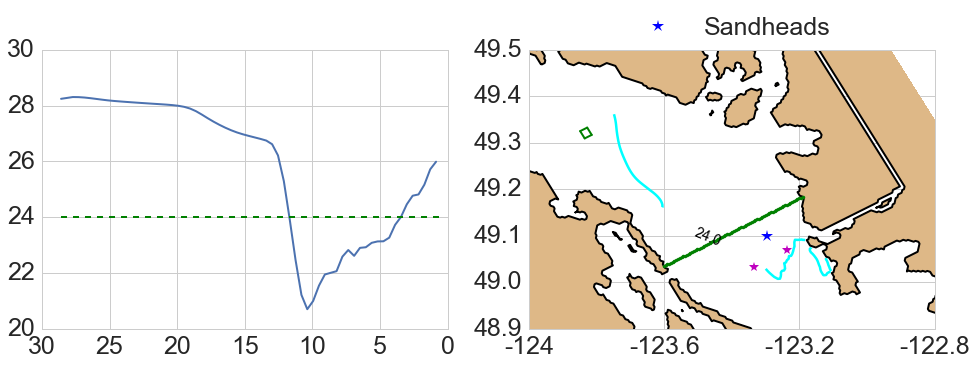

In [64]:
    grid_T = janall_T;grid_U = janall_U;grid_V = janall_V
    tst = 0; ted = 2
    dep_ind = 0; err = 0.2
    fig, axs = plt.subplots(1,2,figsize= (16,5))
    S = grid_T.variables['vosaline']
    lon = grid_T.variables['nav_lon']
    lat = grid_T.variables['nav_lat']
    S_aveN = np.nanmean(S[tst:ted,:,-5:,0:5],axis = 0) ## first temporal average of northern region
    S_aveT =np.ma.masked_values(np.nanmean(S[tst:ted,:,36,4:70],axis = 0),0) ## temporal average of the transect
    U = grid_U.variables['vozocrtx']
    V = grid_V.variables['vomecrty']
    #jinds = np.arange(4,70)
    Distances = np.zeros([70-4])
    for i in np.arange(4,70):
        Distances[i-4] = geo_tools.haversine(lon[36,70],lat[36,70],lon[36,i],lat[36,i]) 
    iinds = np.arange(36,37)
    ax = axs[0] ## plot salinity along transect
    ax.plot(Distances,S_aveT[dep_ind,:])
    ax.set_ylim([20,30])
    ax.set_xlim([Distances[0],Distances[-1]])
    ax.set_xticks([0,5,10,15,20,25,30])
    S_ref = np.nanmean(S_aveN[dep_ind]) ## then spatial average
    S_thre = 1.14*S_ref-4.8
    ax.plot([Distances[0],Distances[-1]],[S_thre,S_thre],'g--')
    
    ax = axs[1] ## salinity contour in the whole subdomain
    viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
    viz_tools.plot_coastline(ax, grid6, coords = 'map')
    S_aveW = np.nanmean(S[tst:ted,dep_ind],axis = 0) ## temporal averaged of the whole domain
    S_aveW = np.ma.masked_values(S_aveW, 0) ## mask 0 value
    #mesh = ax.pcolormesh(lon[:],lat[:],S_aveW[:],cmap = 'plasma_r',vmin=0, vmax=32)
    
    CS3 = ax.contour(lon[:],lat[:],S_aveW, levels = [S_thre], colors='cyan',linewidths=(2.5))
    plt.clabel(CS3, fmt='%2.1f',inline=1,inline_spacing=-2,colors='k',fontsize = 14)
    #fmt='%2.1f'
    #cbar=fig.colorbar(mesh,ax =ax)
    #cbar.set_label('Practical Salinity')
    ax.plot(lon[55,0:80],lat[55,0:80],'g.') ## transect
    
    ax.plot(lon[-5:,0],lat[-5:,0],'g-')
    ax.plot(lon[-5:,4],lat[-5:,4],'g-')
    ax.plot(lon[-5,0:5],lat[-5,0:5],'g-')
    ax.plot(lon[-1,0:5],lat[-1,0:5],'g-')
    ax.plot(lon[46,53],lat[46,53],'b*',markersize = 12,label = 'Sandheads')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=5, fancybox=False, shadow=True)
    #ax.legend(loc = 3)
    
    for i in np.arange(S_aveT.shape[1]):
        if abs(S_aveT[dep_ind,i] -S_thre)<= err:
            print('i,lon,real salinity',i,lon[36,i], S_aveT[dep_ind,i])
            ax.plot(lon[36,i],lat[36,i],'m*',markersize = 10)
    print('S_ref',S_ref)
    print('S_thre',S_thre)
    
    ax.set_xlim([-124.,-122.8])
    ax.set_xticks([-124,-123.6,-123.2,-122.8])
    ax.set_xticklabels([-124,-123.6,-123.2,-122.8])
    ax.set_ylim([48.9,49.5])

In [7]:
def determine_plume_method2(grid_T,grid_U,grid_V,tst,ted,dep_ind,err):
    """Similar to method1, but this time the S_ref is the spatial mean 
    of the 2.5*2.5 km in the northern of my subdomain"""
    fig, axs = plt.subplots(1,2,figsize= (16,5))
    S = grid_T.variables['vosaline']
    lon = grid_T.variables['nav_lon']
    lat = grid_T.variables['nav_lat']
    S_aveN = np.nanmean(S[tst:ted,:,-5:,0:5],axis = 0) ## first temporal average of northern region
    S_aveT =np.ma.masked_values(np.nanmean(S[tst:ted,:,55,0:80],axis = 0),0) ## temporal average of the transect
    U = grid_U.variables['vozocrtx']
    V = grid_V.variables['vomecrty']
    #jinds = np.arange(4,70)
    Distances = np.zeros([80-0])
    for i in np.arange(0,80):
        Distances[i] = geo_tools.haversine(lon[55,80],lat[55,80],lon[55,i],lat[55,i]) 
    iinds = np.arange(36,37)
    ax = axs[0] ## plot salinity along transect
    ax.plot(Distances,S_aveT[dep_ind,:])
    ax.set_ylim([5,30])
    ax.set_xlim([Distances[0],Distances[-1]])
    ax.set_xticks([0,5,10,15,20,25,30])
    S_ref = np.nanmean(S_aveN[dep_ind]) ## then spatial average
    S_thre = 1.14*S_ref-4.8
    ax.plot([Distances[0],Distances[-1]],[S_thre,S_thre],'g--')
    ax.set_xlabel('Along-transect distance [km]')
    ax.set_ylabel('Practical Salinity')
    ax = axs[1] ## salinity contour in the whole subdomain
    viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
    viz_tools.plot_coastline(ax, grid6, coords = 'map')
    S_aveW = np.nanmean(S[tst:ted,dep_ind],axis = 0) ## temporal averaged of the whole domain
    S_aveW = np.ma.masked_values(S_aveW, 0) ## mask 0 value
    mesh = ax.contourf(lon[:],lat[:],S_aveW[:],cmap = 'plasma_r')
    CS3 = plt.contour(lon[:],lat[:],S_aveW, levels = [S_thre], colors='cyan',linewidths=(2.5))
    plt.clabel(CS3,fmt='%2.1f', inline=1,inline_spacing=-15,colors='k',fontsize = 14)
    cbar=fig.colorbar(mesh,ax =ax)
    
    cbar.set_label('Practical Salinity')
    ax.plot(lon[55,0:80],lat[55,0:80],'g.') ## transect
    
    
    ax.plot(lon[-5:,0],lat[-5:,0],'r-')
    ax.plot(lon[-5:,4],lat[-5:,4],'r-')
    ax.plot(lon[-5,0:5],lat[-5,0:5],'r-')
    ax.plot(lon[-1,0:5],lat[-1,0:5],'r-')
    ax.plot(lon[46,53],lat[46,53],'k*',markersize = 12,label ='Sandheads')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=5, fancybox=False, shadow=True)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    for i in np.arange(S_aveT.shape[1]):
        if abs(S_aveT[dep_ind,i] -S_thre)<= err:
            print('i,lon,real salinity',i,lon[55,i], S_aveT[dep_ind,i])
            ax.plot(lon[55,i],lat[55,i],'r*',markersize = 10)
    print('S_ref',S_ref)
    print('S_thre',S_thre)
    
    ax.set_xlim([-124.,-122.8])
    ax.set_xticks([-124,-123.6,-123.2,-122.8])
    ax.set_xticklabels([-124,-123.6,-123.2,-122.8])
    ax.set_ylim([48.9,49.5])

i,lon,real salinity 48 -123.351 26.7642
S_ref 27.7367
S_thre 26.8197989273


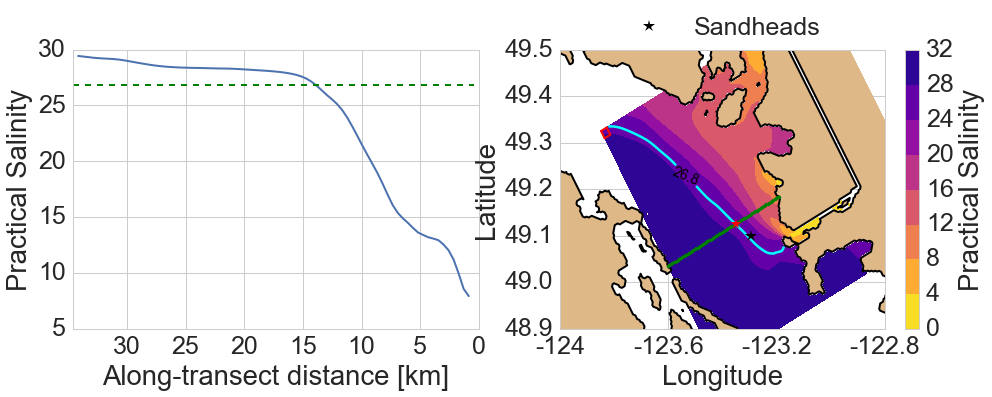

In [76]:
determine_plume_method2(octall_T,octall_U,octall_V,408,480,0,0.2)

i,lon,real salinity 18 -123.507 22.3781
S_ref 23.8296
S_thre 22.365773735


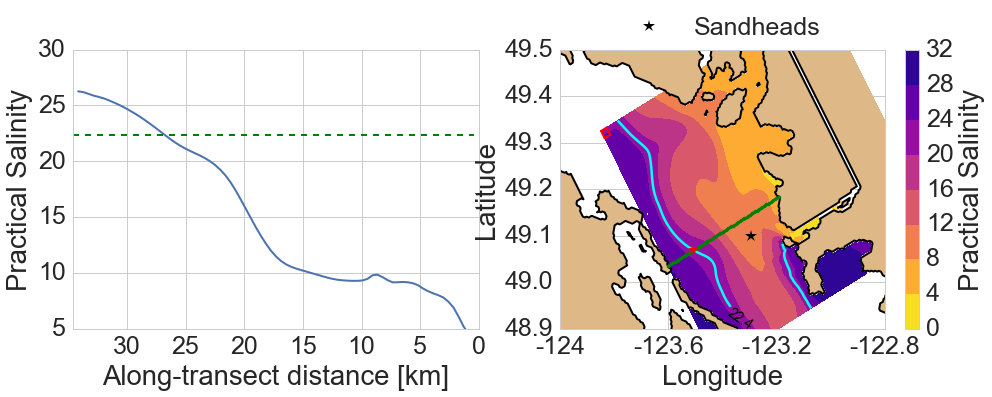

In [27]:
determine_plume_method2(octnowind_T,octnowind_U,octnowind_V,408,480,0,0.2)

i,lon,real salinity 9 -123.554 19.7869
S_ref 21.6528
S_thre 19.8841959


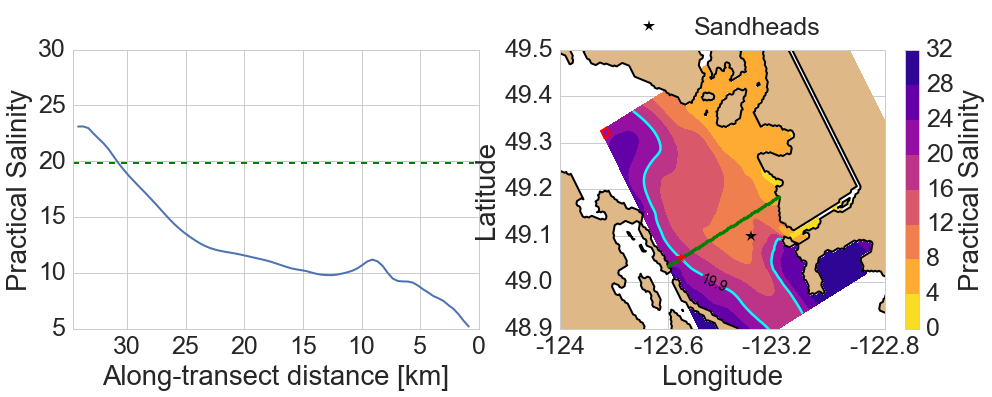

In [28]:
determine_plume_method2(octnowind_T,octnowind_U,octnowind_V,480,551,0,0.2)

In [12]:
def get_Rmix(gridT1,gridT2,gridT3,gridT4,gridT5,tst,ted,dep_ind):
    """This function was made to get the time averaged Rmix"""
    rmix = {};
    for grid_T,st,in zip([gridT1,gridT2,gridT3,gridT4,gridT5],['onlyriver','river+tides',\
                        'river+winds','nof','all']):
        S = grid_T.variables['vosaline']
        lon = grid_T.variables['nav_lon']
        dep = grid_T.variables['deptht']
        S_ave = np.nanmean(S[tst:ted+1],axis = 0)
        rmix[st] = RS.R_mixAve(S_ave,np_mask,dep_ind)
    return rmix

In [9]:
def threshold_near_far(gridT1,gridT2,gridT3,gridT4,gridT5,tst,ted,np_mask,dep_ind):
    """This function is made to select the 
    transition from near to far field in the plume by
    criteria of Rmix(river+wind)/Rmix(all) >=0.9 and 
    Rmix(river+tide)/Rmix(all) <=0.7"""
    far_rmix_wind = [];
    far_rmix_tide = [];
    far_lon = []; iss =[];
    lon = gridT5.variables['nav_lon']
    f, rmix = RS.plot_Rmix_together(gridT1,gridT2,gridT3,gridT4,gridT5,tst,ted,np_mask,dep_ind)
    fig, ax = plt.subplots(1,1,figsize = (14,3))
    for i in np.arange(4,70):
        #if (rmix['river+winds'][36,i]/rmix['all'][36,i] >= 0.9) and \
        #(rmix['river+tides'][36,i]/rmix['all'][36,i] <= 0.7):
        if (rmix['river+winds'][36,i] - rmix['river+tides'][36,i])/rmix['all'][36,i]>=0.1:
            ax.plot(lon[36,i],rmix['river+winds'][36,i],'g*',markersize = 10)
            ax.plot(lon[36,i],rmix['all'][36,i],'y*',markersize = 10)
            ax.plot(lon[36,i],rmix['river+tides'][36,i],'b*',markersize = 10)
            far_rmix_wind.append(rmix['river+winds'][36,i])
            far_rmix_tide.append(rmix['river+tides'][36,i])
            far_lon.append(lon[36,i])
            iss.append(i)
    ax.set_xlim([-123.55,-123.15])
    return far_rmix_wind,far_rmix_tide,far_lon,iss

In [10]:
def determine_plume_method2_onlysalinity(grid_T,tst,ted,dep_ind,ave_flag = False):
    """Similar to method1, but this time the S_ref is the spatial mean 
    of the 2.5*2.5 km in the northern of my subdomain and not plot them, only get the
    threshold salinity"""
    S = grid_T.variables['vosaline']
    lon = grid_T.variables['nav_lon']
    lat = grid_T.variables['nav_lat']
    S_aveN = np.nanmean(S[tst:ted,:,-5:,0:5],axis = 0) ## first temporal average of northern region
    S_ref = np.nanmean(S_aveN[dep_ind]) ## then spatial average at specific depth
    S_aveW = np.nanmean(S[tst:ted,dep_ind],axis = 0)
    S_thre = 1.14*S_ref-4.8
    #S_aveW = np.nanmean(S[tst:ted,dep_ind],axis = 0) ## temporal averaged of the whole domain
    S_aveW = np.ma.masked_values(S_aveW, 0) ## mask 0 value
    return S_thre, S_aveW

In [82]:
def threshold_whole_domain2(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind,dep):
    """This is another criteria for determine near of far field
        (Rmix(wind)-Rmix(tide))/Rmix(all)>0.1 then far field"""
    thre_values = []; thre_js = [];thre_is = [];
    rmix = get_Rmix(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind)
    threshold = (rmix['river+winds'] - rmix['river+tides'])/rmix['all']
    lon = all_T.variables['nav_lon']
    lat = all_T.variables['nav_lat']
    levels = [-0.2,-0.1,0,0.1,0.2,0.3]
    origin = 'lower';
    fig, ax = plt.subplots(1,1,figsize = (8,5))
    CS = ax.contourf(lon[:],lat[:],threshold[:],levels,cmap = 'jet',origin=origin,extend='both')
    CS2 = ax.contour(CS,levels=CS.levels,colors = 'k', origin=origin,hold='on',linewidths=(2,))
    #plt.clabel(CS2,fmt='%2.1f', colors='g',fontsize = 14)
    cbar = fig.colorbar(CS,ax = ax)
    cbar.add_lines(CS2)
    cbar.set_label('Rmix')
    ## plot plume edge on top of the different plume regions
    S_thre,W = determine_plume_method2_onlysalinity(all_T,tst,ted,dep)
    CS3 = ax.contour(lon[:],lat[:],W, levels = [S_thre,S_thre+2], colors='cyan',linewidths=(2,))
    CS3.collections[-2].set_linewidth(3.5) 
    plt.clabel(CS3,fmt='%2.1f', colors='k',fontsize = 14)
    viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
    viz_tools.plot_coastline(ax, grid6, coords = 'map')
    ax.set_xlim([-124.,-122.8])
    ax.set_ylim([48.9,49.5])
    ## return the values and indices where threshould == 0.1
    #for j in np.arange(130):
        #for i in np.arange(157):
            #if threshold[j,i] ==0.1:
                #thre_values.append(threshold[j,i])
                #thre_js.append(j)
                #thre_is.append(i)
    return threshold

In [83]:
def rmix_each(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind):
    """This function was made to plot the averaged Rmix spatial pattern
    of each run case"""
    rmix = get_Rmix(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind)
    lon = all_T.variables['nav_lon']
    lat = all_T.variables['nav_lat']
    fig = plt.figure(figsize=(18,14))
    gs = gridspec.GridSpec(3, 2,width_ratios=[1,1], height_ratios=[1,1,1])  
    gs.update(hspace=0.2, wspace=0.1)
    levels = np.arange(0,1.1,0.1)
    for ti, ax in zip(['onlyriver','river+tides','river+winds','nof','all'],[fig.add_subplot(gs[0,0]),fig.add_subplot(gs[0,1]),\
                     fig.add_subplot(gs[1,0]),fig.add_subplot(gs[1,1]),fig.add_subplot(gs[2,0])]):
        CS = ax.contourf(lon[:],lat[:],rmix[ti],levels,cmap = 'jet',extend='both')
        CS2 = ax.contour(CS, colors = 'k',hold='on',linewidths=(2,))
        cbar = fig.colorbar(CS,ax = ax)
        cbar.add_lines(CS2)
        cbar.set_label('Rmix')
        viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
        viz_tools.plot_coastline(ax, grid6, coords = 'map')
        ax.set_title(ti)
        ax.set_xlim([-124.,-122.8])
        ax.set_ylim([48.9,49.5])

In [102]:
def rmix_each_Three(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind):
    """This function was made to plot the averaged Rmix spatial pattern
    for only river, rive +tides and river +winds cases"""
    rmix = get_Rmix(river_T,nowind_T,notide_T,nof_T,all_T,tst,ted,dep_ind)
    lon = all_T.variables['nav_lon']
    lat = all_T.variables['nav_lat']
    fig = plt.figure(figsize=(16,5))
    gs = gridspec.GridSpec(1, 3,width_ratios=[1,1,1])  
    gs.update(hspace=0.2, wspace=0.24)
    levels = np.arange(0,1.1,0.1)
    for ti, ax in zip(['river+tides','river+winds','all'],[fig.add_subplot(gs[0,0]),fig.add_subplot(gs[0,1]),\
                     fig.add_subplot(gs[0,2])]):
        CS = ax.contourf(lon[:],lat[:],rmix[ti],levels,cmap = 'plasma_r',extend='both')
        CS2 = ax.contour(CS, colors = 'k',hold='on',linewidths=(2,))
        S_thre,W = determine_plume_method2_onlysalinity(all_T,tst,ted,0)
        CS3 = ax.contour(lon[:],lat[:],W, levels = [S_thre], colors='cyan',linewidths=(2,))
        plt.clabel(CS3,fmt='%2.1f', colors='r',fontsize = 14)
        cbar = fig.colorbar(CS,ax = ax,orientation = 'horizontal')
        cbar.add_lines(CS2)
        cbar.set_label('Rmix')
        viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
        viz_tools.plot_coastline(ax, grid6, coords = 'map')
        #ax.set_title(ti)
        ax.set_xlim([-124.,-122.8])
        ax.set_xticks([-124,-123.6,-123.2,-122.8])
        ax.set_xticklabels([-124,-123.6,-123.2,-122.8])
        ax.set_ylim([48.9,49.5])

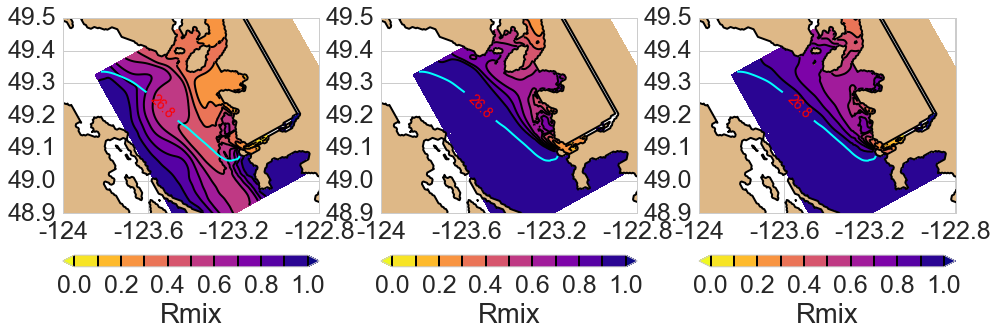

In [103]:
rmix_each_Three(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,408,480,10)

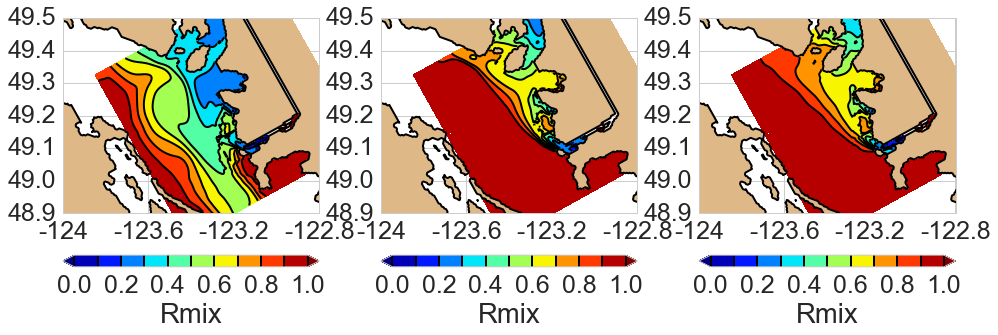

In [93]:
rmix_each_Three(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,408,480,10)

* weak wind

S_ref 26.6485
S_thre 25.5792752838
i,lon,real salinity 12 -123.475 16.6677
i,lon,real salinity 13 -123.47 16.4818
i,lon,real salinity 50 -123.277 16.7962
i,lon,real salinity 63 -123.21 16.561
S_ref 18.7855
S_thre 16.6154542923
i,lon,real salinity 25 -123.407 24.0631
S_ref 25.2179
S_thre 23.9484008789


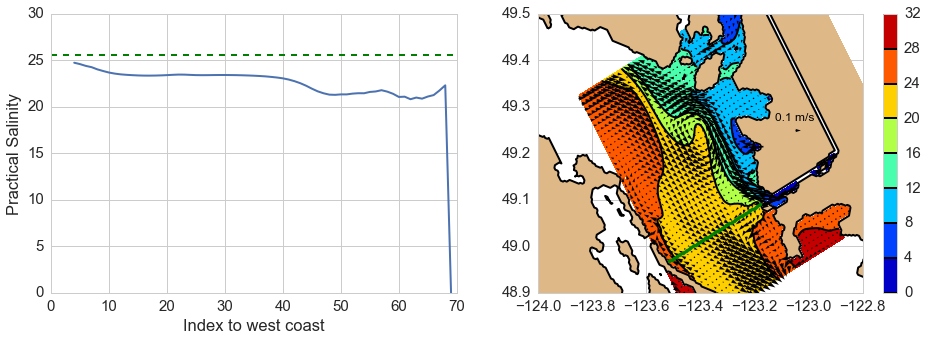

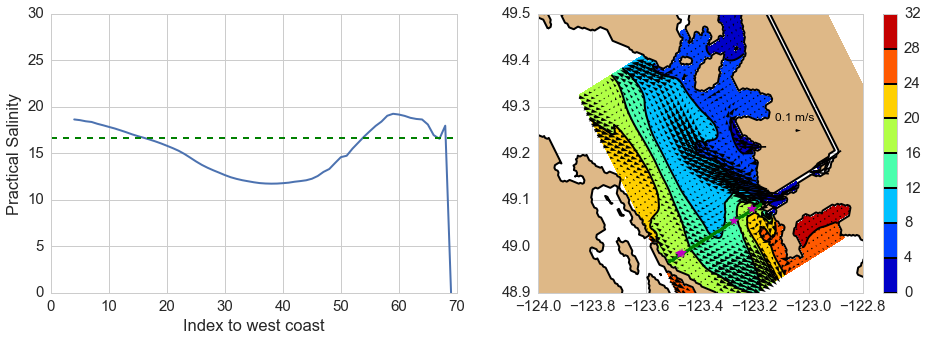

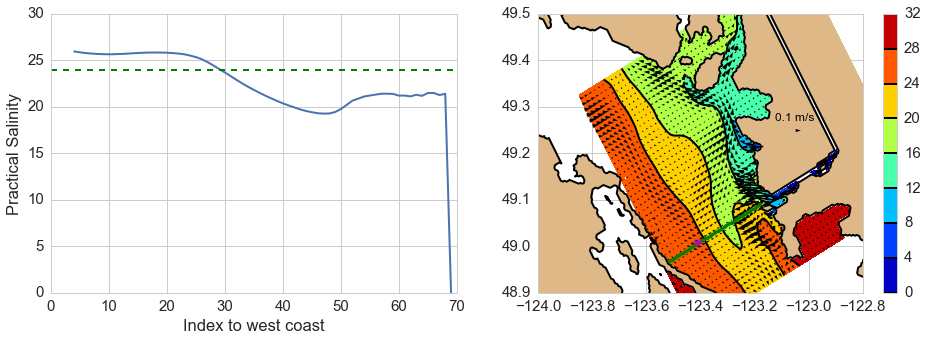

In [11]:
DEP.determine_plume_method2(octall_T,octall_U,octall_V,48,143,0,0.2) ## Oct 2~5, neap tides
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,192,263,0,0.2) ## May 9~11, spring tides
DEP.determine_plume_method2(janall_T,janall_U,janall_V,168,239,0,0.2) ## Jan 8~10, late neap early spring 

In [48]:
geo_tools.find_closest_model_point(-123.6, 49.35, X,Y,land_mask=bathy.mask)

(496, 280)

river+winds 0.848106
river+tides 0.633729


(48.9, 49.5)

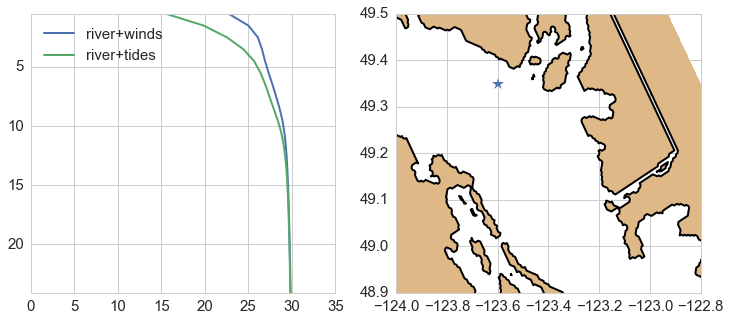

In [57]:
t1 = 48;t2 = 143;j = 496 - 380; i = 280-240
fig, axs = plt.subplots(1,2,figsize = (12,5))
sal = {}
dep = octall_T.variables['deptht']
ax = axs[0]
for gridT, string in zip([octnotide_T,octnowind_T],['river+winds','river+tides']):
    sal[string] = gridT.variables['vosaline'][t1:t2,:,j,i]
    ax.plot(np.nanmean(sal[string],axis = 0), dep, label = string)
    print(string,np.nanmean(sal[string],axis = 0)[0]/np.nanmean(np.nanmean(sal[string],axis = 0)[0:10],axis = 0))
    ax.set_ylim([dep[-20],dep[0]])
    ax.legend(loc = 'best')
ax = axs[1]
viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
viz_tools.plot_coastline(ax, grid6, coords = 'map')
ax.plot(lon[j,i],lat[j,i],marker = '*',markersize = 12)
ax.set_xlim([-124.,-122.8])
ax.set_ylim([48.9,49.5])

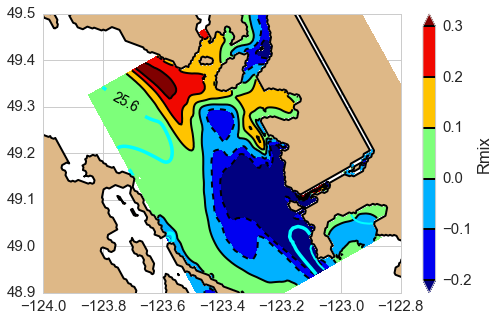

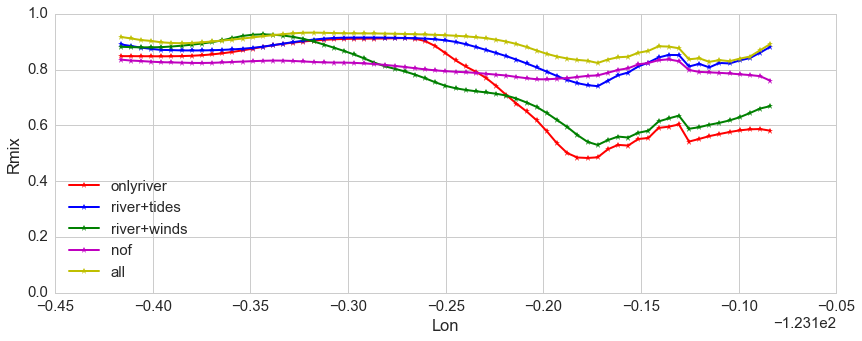

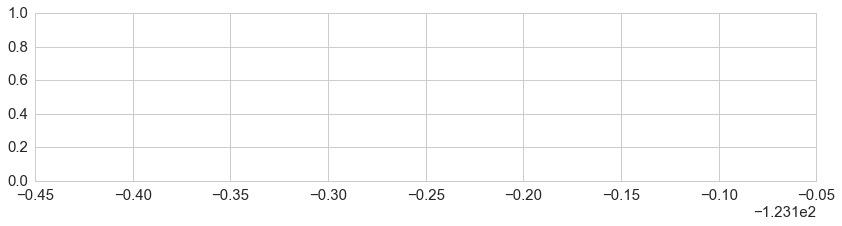

In [23]:
## the whole domain, weak winds + neap tides, oct 2~5
threshold_whole_domain2(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,48,143,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(octriver_T,octnowind_T,octnotide_T,\
                                                             octnof_T,octall_T,48,143,np_mask,10)

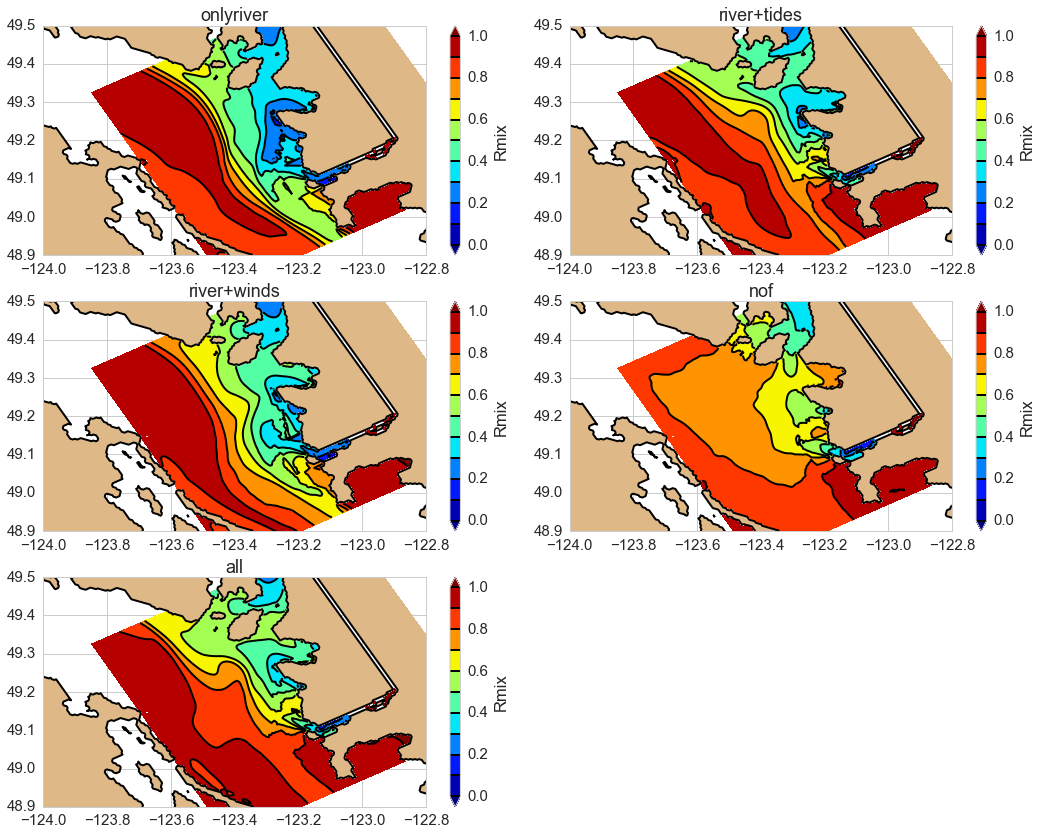

In [39]:
rmix_each(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,48,143,10)

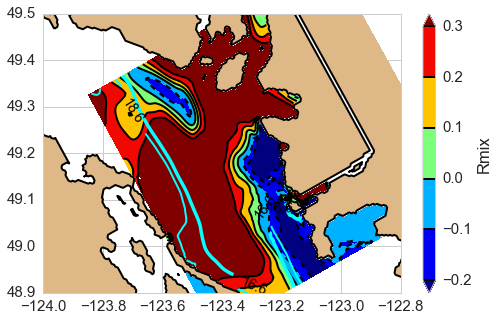

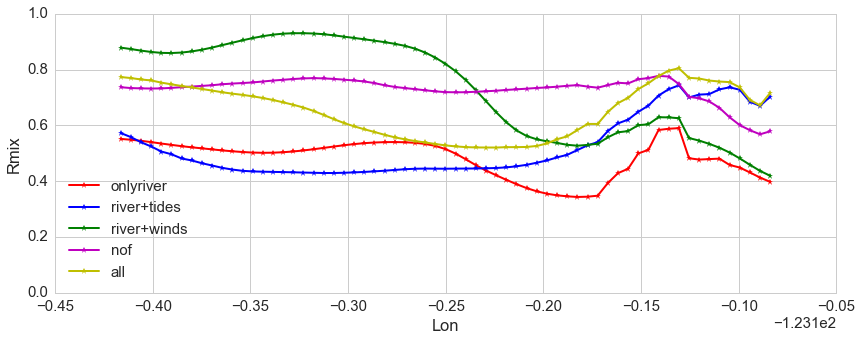

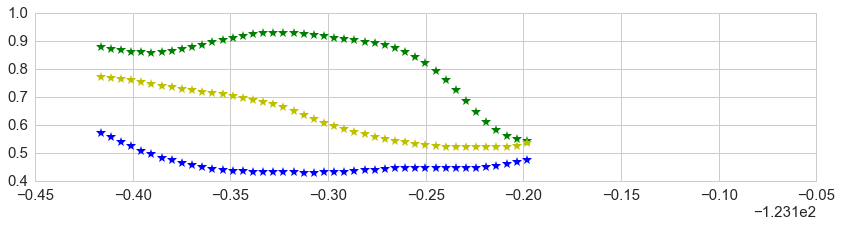

In [24]:
## the whole domain, weak winds + spring tides, may 9~11
threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,192,263,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(mayriver_T,maynowind_T,maynotide_T,\
                                                             maynof_T,mayall_T,192,263,np_mask,10)

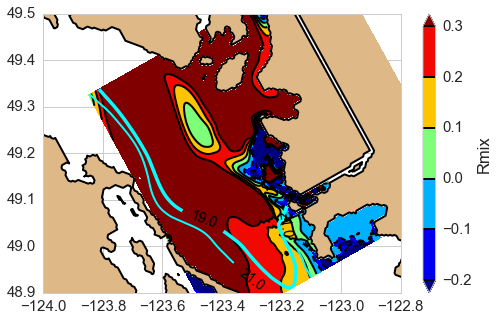

In [14]:
## Another weak wind may
thre = threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,576,648,10,0)

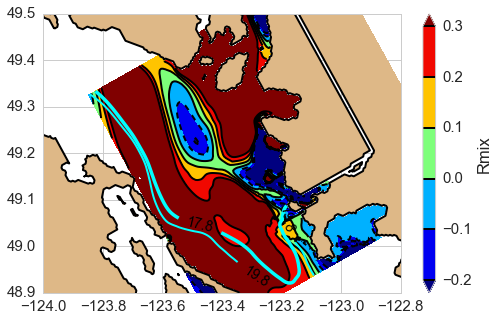

In [15]:
## Another weak wind may
thre = threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,600,671,10,0)

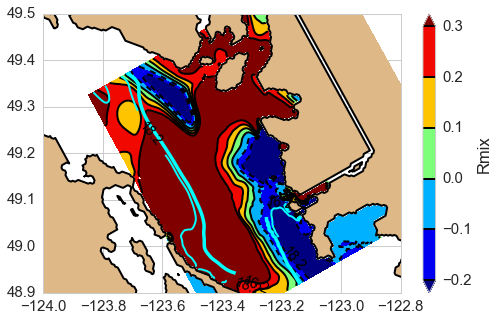

In [36]:
threshold = threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,216,242,10,0)

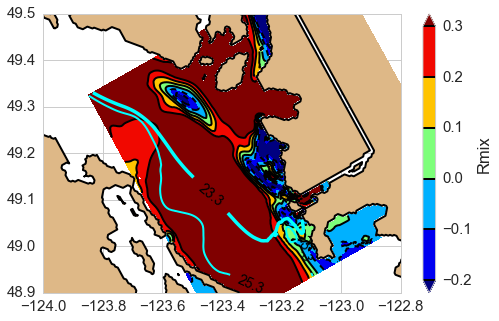

In [70]:
threshold = threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,336,360,10,0)

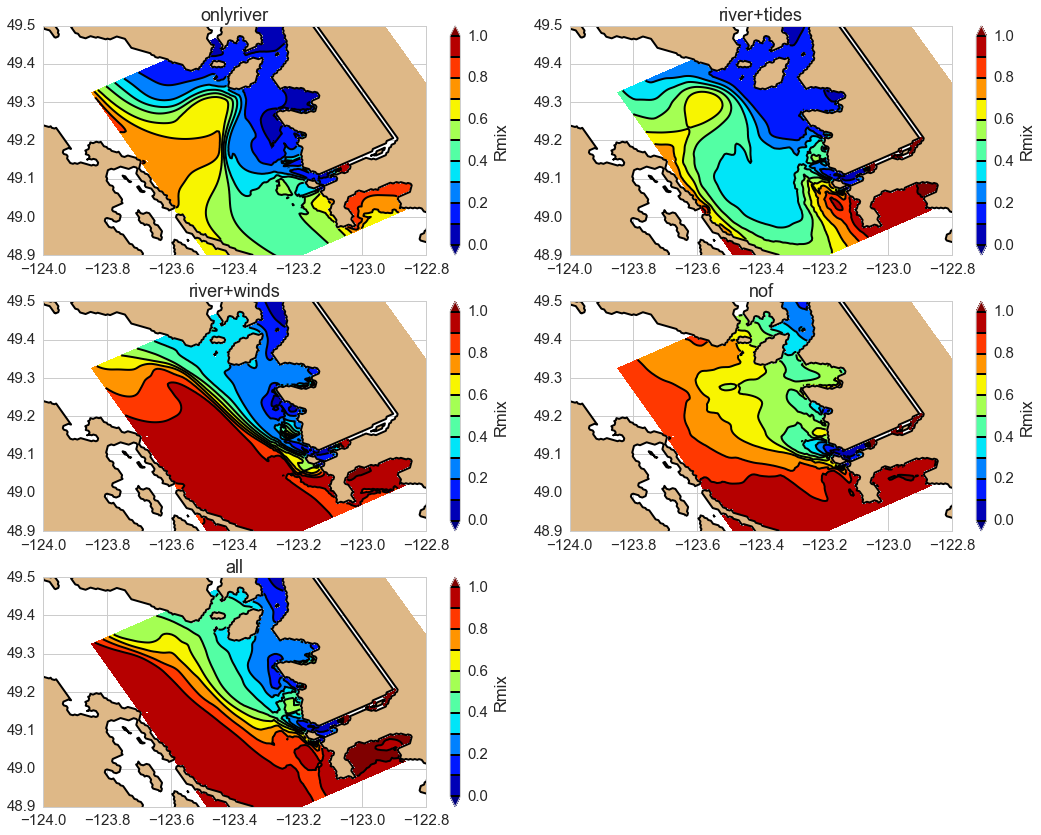

In [71]:
rmix_each(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,336,360,10)

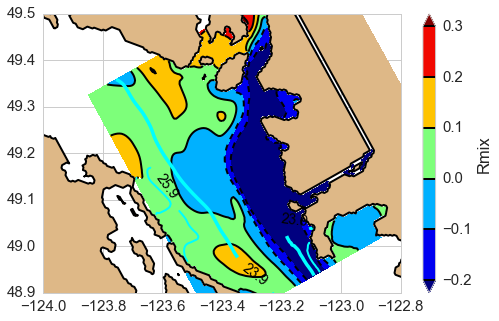

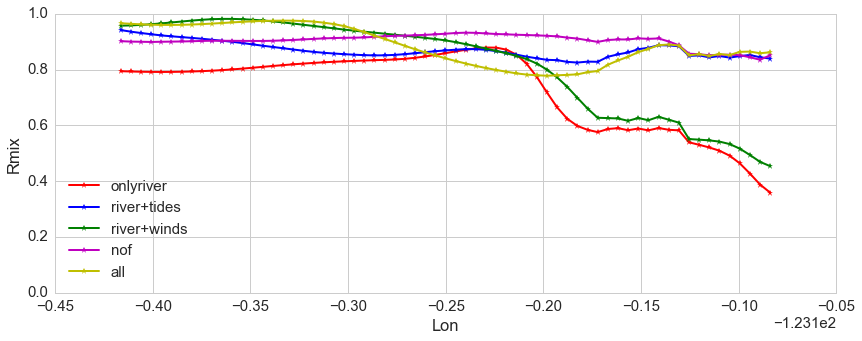

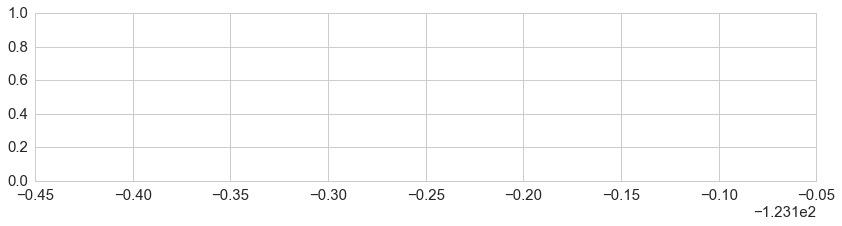

In [25]:
## the whole domain, weak winds + late neap tides, jan 8~10
threshold_whole_domain2(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,168,239,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(janriver_T,jannowind_T,jannotide_T,\
                                                             jannof_T,janall_T,168,239,np_mask,10)

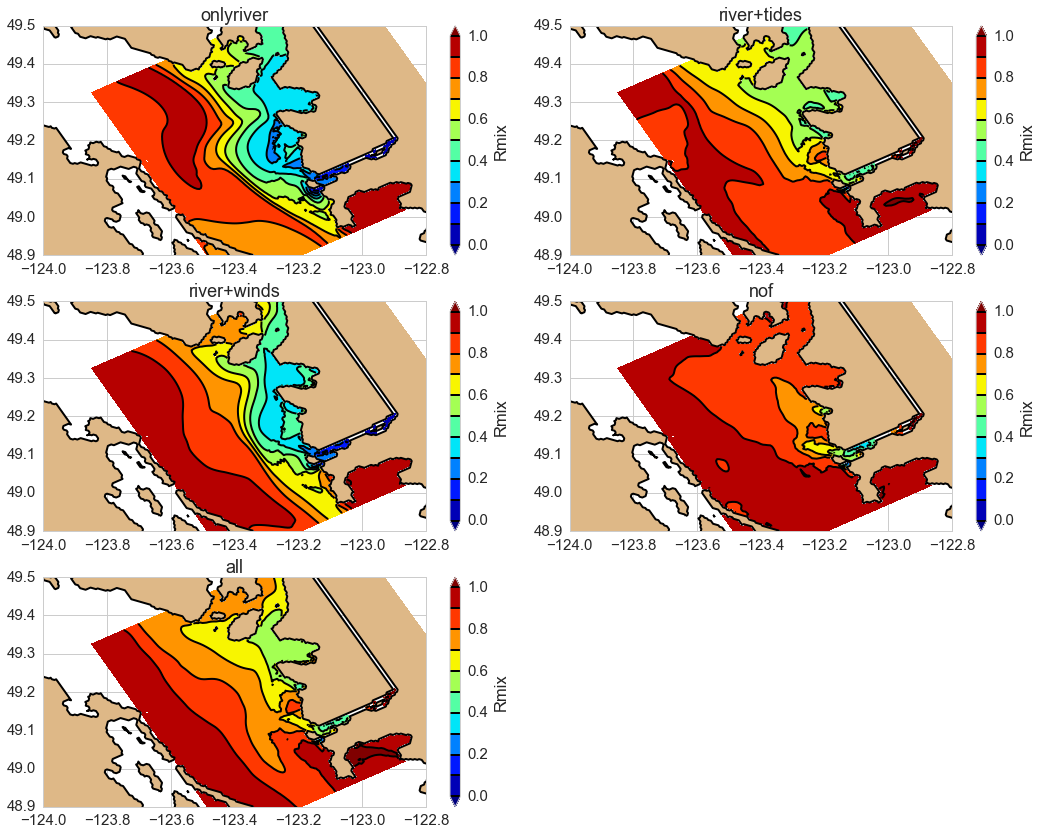

In [40]:
rmix_each(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,168,239,10)

* moderate wind

i,lon,real salinity 52 -123.267 26.8949
i,lon,real salinity 53 -123.262 26.6704
S_ref 27.7367
S_thre 26.8197989273
i,lon,real salinity 32 -123.371 22.5049
i,lon,real salinity 33 -123.366 22.276
S_ref 23.8765
S_thre 22.4191612244
i,lon,real salinity 20 -123.433 15.6408
i,lon,real salinity 21 -123.428 15.537
i,lon,real salinity 22 -123.423 15.4021
i,lon,real salinity 59 -123.231 15.5569
i,lon,real salinity 60 -123.225 15.564
S_ref 17.8328
S_thre 15.5293766785
i,lon,real salinity 58 -123.236 25.5461
i,lon,real salinity 59 -123.231 25.4949
i,lon,real salinity 60 -123.225 25.3431
S_ref 26.4876
S_thre 25.3958948135


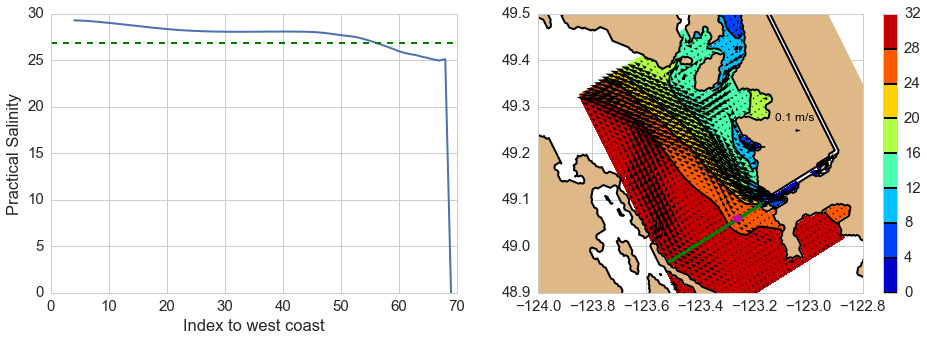

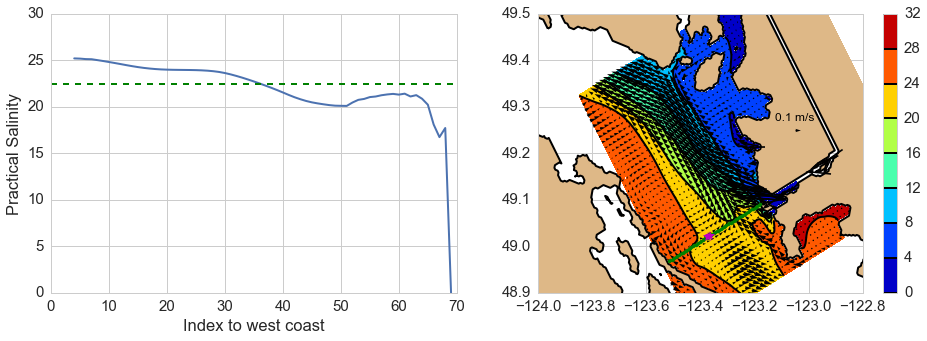

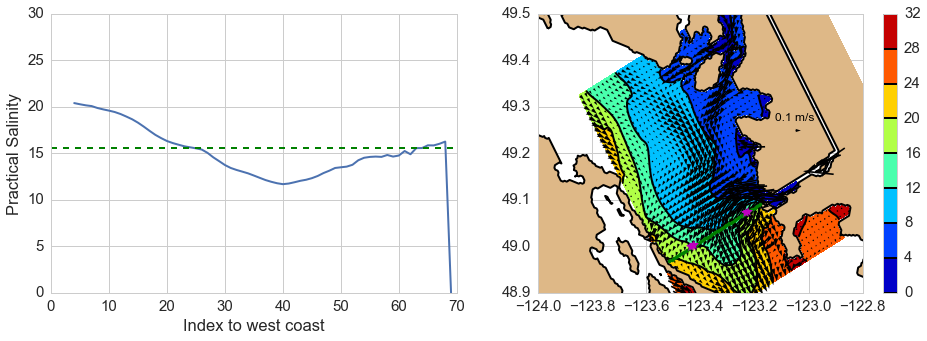

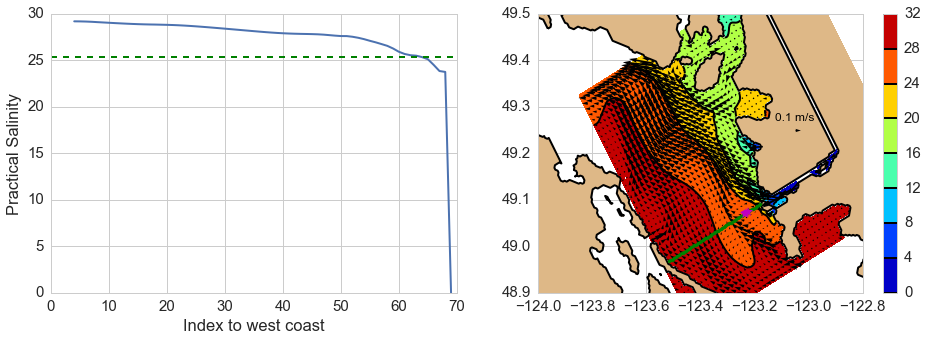

In [11]:
DEP.determine_plume_method2(octall_T,octall_U,octall_V,408,480,0,0.2) ## Oct 18~20, late spring to neap
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,288,359,0,0.2) ## May 13~15, neap tides
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,432,455,0,0.2) ## May 16~19, spring tides
DEP.determine_plume_method2(janall_T,janall_U,janall_V,384,455,0,0.2) ## Jan 17~19, late neap early spring 

i,lon,real salinity 0 -123.537 15.7144
i,lon,real salinity 61 -123.22 15.71
S_ref 18.0208
S_thre 15.7437355042


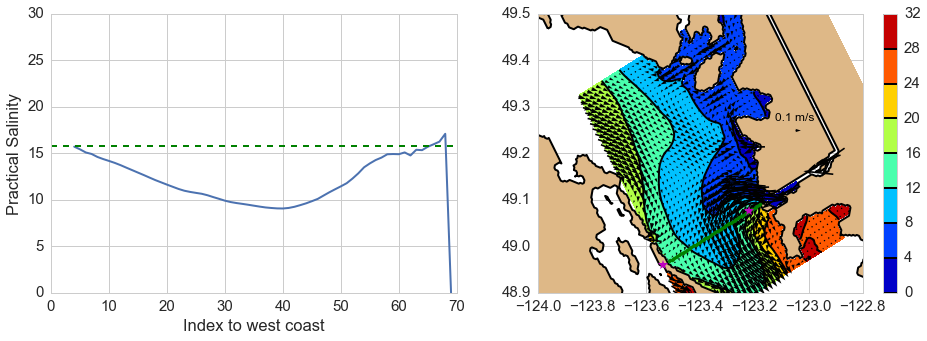

In [12]:
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,432,503,0,0.2) ## May 19~21, moderate SE wind 

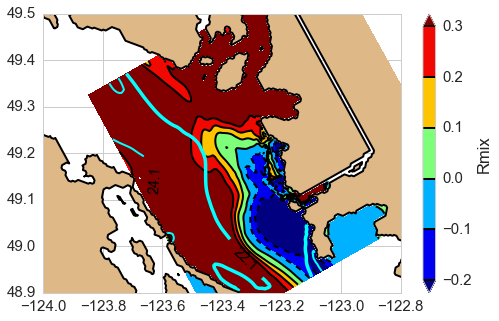

In [26]:
threshold =threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,72,143,10,0)

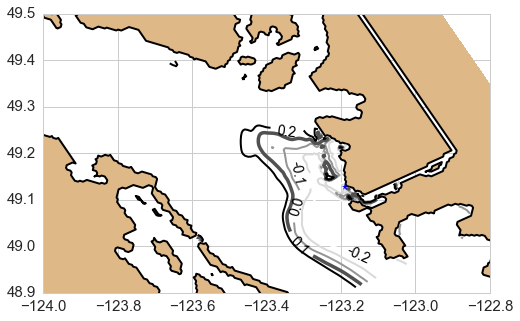

In [101]:
fig, ax = plt.subplots(1,1,figsize = (8,5))
viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
viz_tools.plot_coastline(ax, grid6, coords = 'map')
ax.set_xlim([-124.,-122.8])
ax.set_ylim([48.9,49.5])
CS = ax.contour(lon[:],lat[:],threshold[:],levels=[-0.2,-0.1,0,0.1,0.2],hold='on',linewidths=(2,))
CS.collections[-2].set_linewidth(3.5) 
plt.clabel(CS,fmt='%2.1f', colors='k',fontsize = 14)
ax.plot(lon[44,72],lat[44,72],'b*')
#tidetools.haversine(lon[44,72],lat[44,72],-123.22,49.12)

In [103]:
tidetools.haversine(lon[44,72],lat[44,72],-123.3,49.1)

8.582333538147711

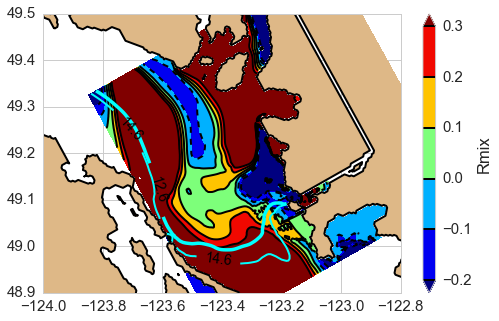

In [27]:
threshold =threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,648,695,10,0)

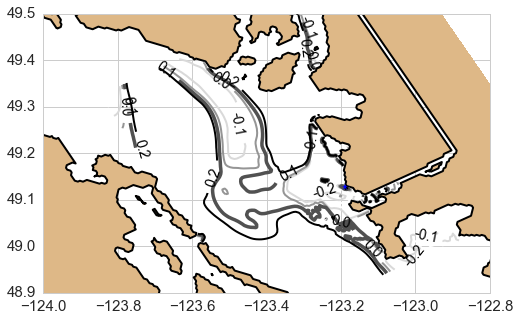

In [99]:
fig, ax = plt.subplots(1,1,figsize = (8,5))
viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
viz_tools.plot_coastline(ax, grid6, coords = 'map')
ax.set_xlim([-124.,-122.8])
ax.set_ylim([48.9,49.5])
CS = ax.contour(lon[:],lat[:],threshold[:],levels=[-0.2,-0.1,0,0.1,0.2],hold='on',linewidths=(2,))
CS.collections[-2].set_linewidth(3.5) 
plt.clabel(CS,fmt='%2.1f', colors='k',fontsize = 14)
ax.plot(lon[44,72],lat[44,72],'b*')
#tidetools.haversine(lon[44,72],lat[44,72],-123.22,49.12)

In [97]:
tidetools.haversine(lon[44,72],lat[44,72],-123.21,49.115)

2.037395470600858

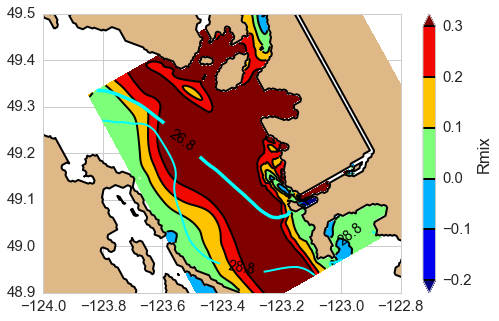

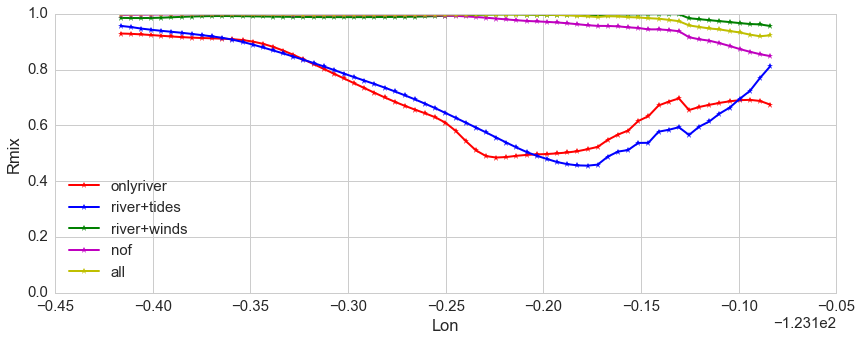

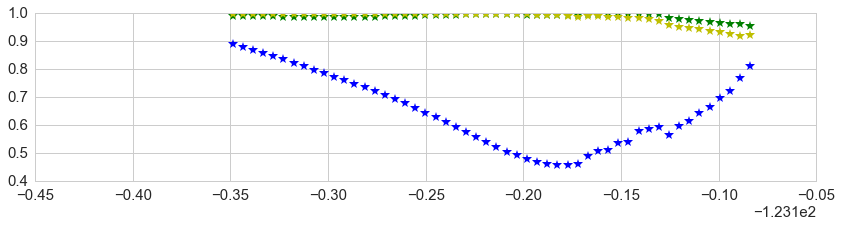

In [28]:
### the whole domain, moderate winds + late spring to neap, oct 18~20
threshold_whole_domain2(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,408,480,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(octriver_T,octnowind_T,octnotide_T,\
                                                             octnof_T,octall_T,408,480,np_mask,10)

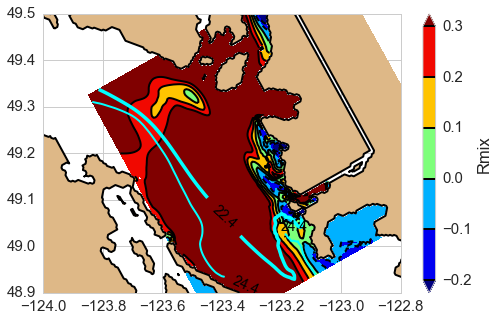

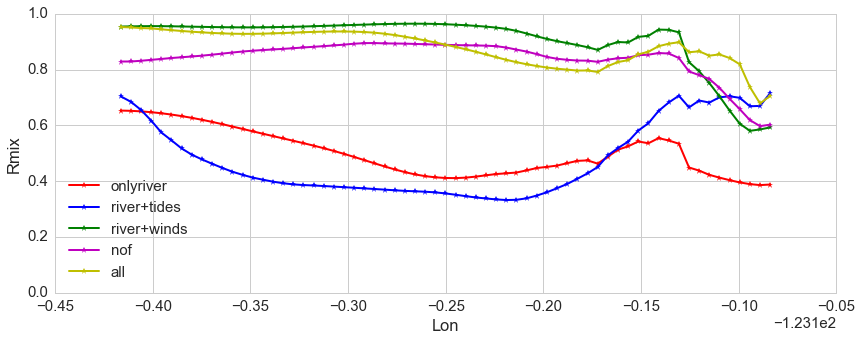

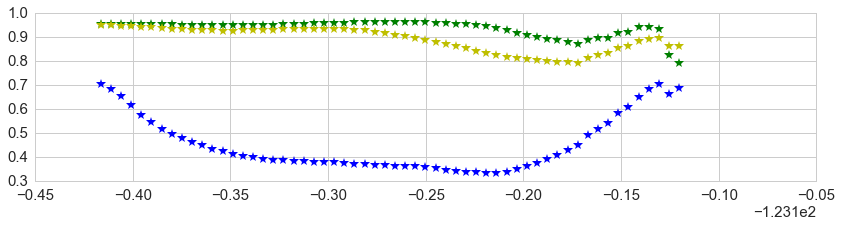

In [29]:
## the whole domain, moderate winds + neap tides, may 13~15
threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,288,359,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(mayriver_T,maynowind_T,maynotide_T,\
                                                             maynof_T,mayall_T,288,359,np_mask,10)

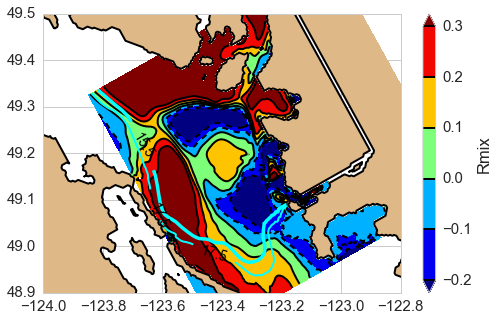

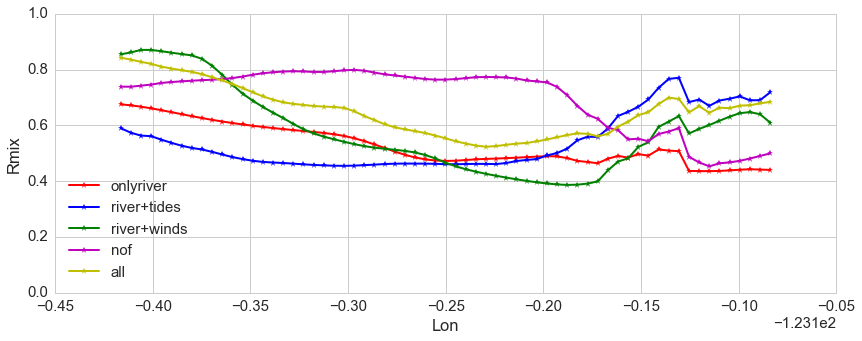

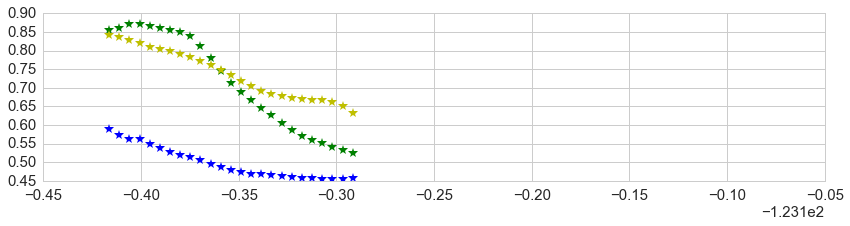

In [30]:
threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,432,455,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(mayriver_T,maynowind_T,maynotide_T,\
                                                             maynof_T,mayall_T,432,455,np_mask,10)

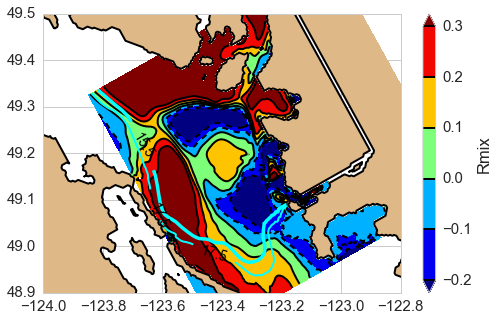

In [43]:
threshould = threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,432,455,10,0)

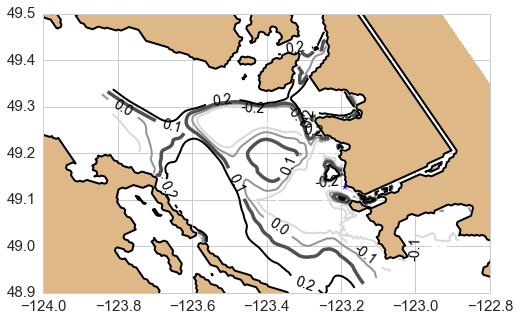

In [44]:
lon = mayall_T.variables['nav_lon'];
lat = mayall_T.variables['nav_lat']
fig, ax = plt.subplots(1,1,figsize = (8,5))
viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
viz_tools.plot_coastline(ax, grid6, coords = 'map')
ax.set_xlim([-124.,-122.8])
ax.set_ylim([48.9,49.5])
CS = ax.contour(lon[:],lat[:],threshould[:],levels=[-0.2,-0.1,0,0.1,0.2],hold='on',linewidths=(2,))
CS.collections[-2].set_linewidth(3.5) 
plt.clabel(CS,fmt='%2.1f', colors='k',fontsize = 14)
ax.plot(lon[44,72],lat[44,72],'b*')

In [47]:
geo_tools.haversine(lon[44,72],lat[44,72],-123.2,49.)

14.217621840320422

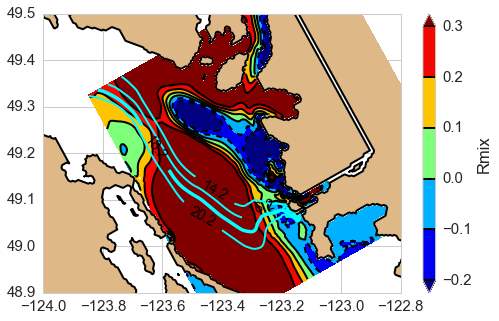

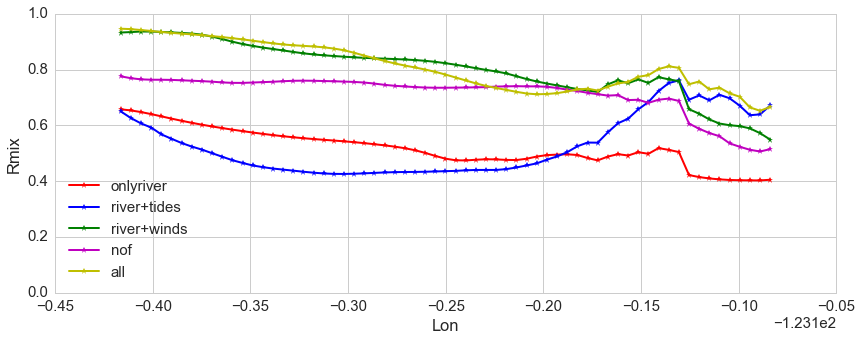

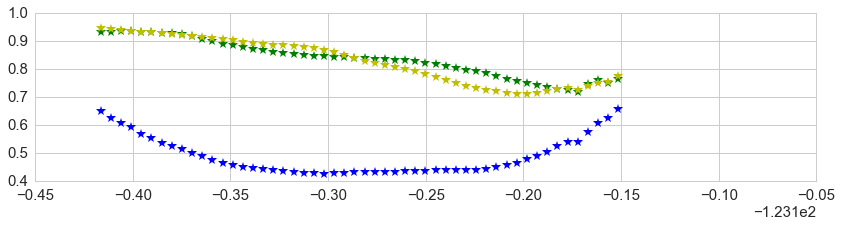

In [18]:
# the whole domain, SE moderate winds + spring tides, may 16~19
threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,360,455,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(mayriver_T,maynowind_T,maynotide_T,\
                                                             maynof_T,mayall_T,360,455,np_mask,10)

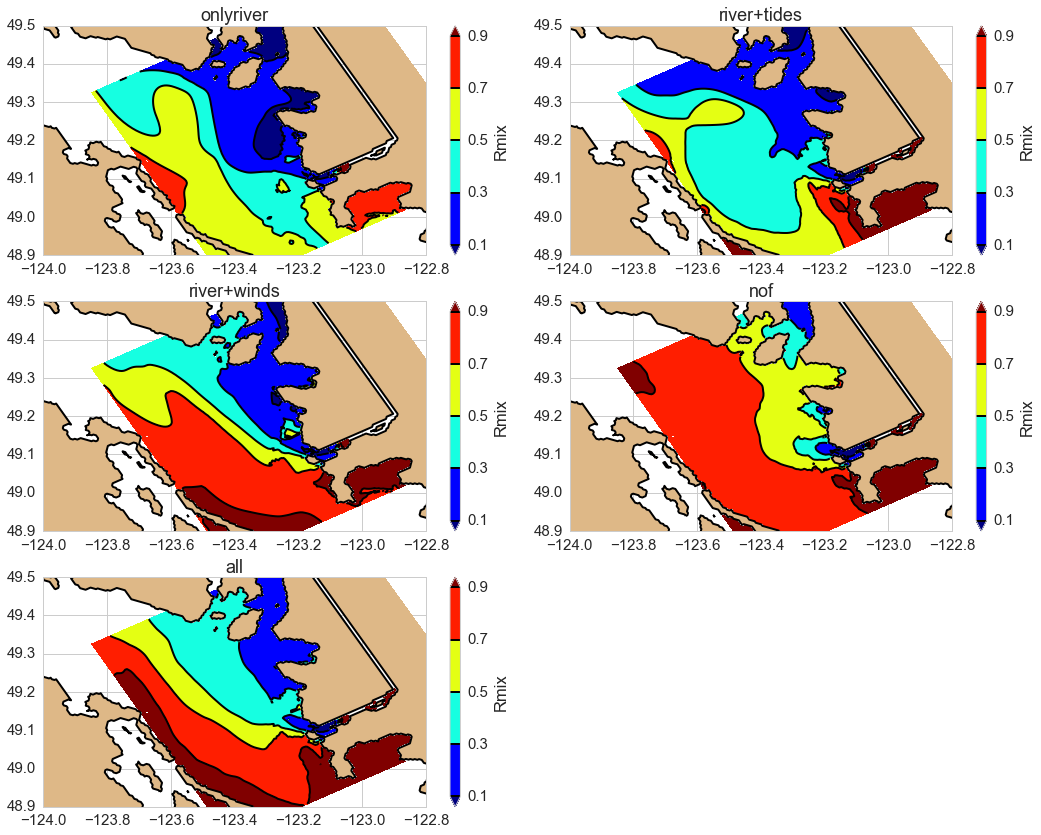

In [19]:
## moderate SE wind
rmix_each(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,360,455,10)

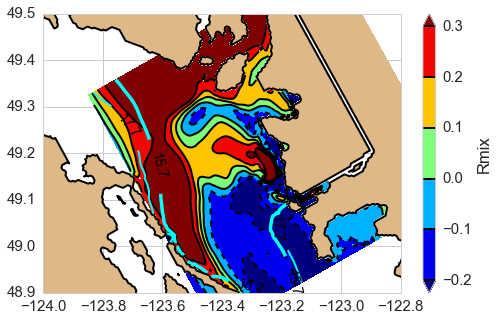

In [11]:
## Moderate May SE 19~21
thre = threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,432,503,10,0)

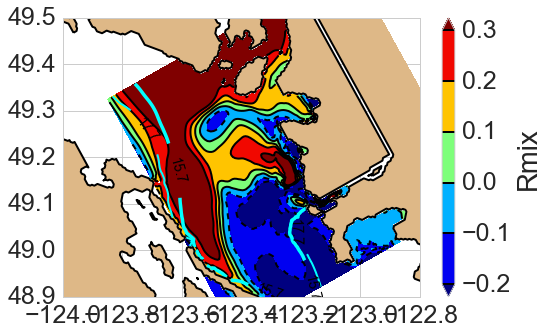

In [105]:
## if select 15 m
thre_15 = threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,432,503,20,0)

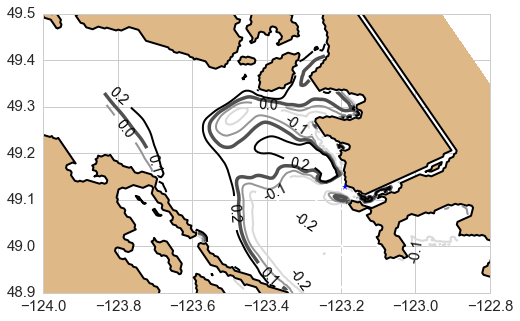

In [12]:
lon = mayall_T.variables['nav_lon'];
lat = mayall_T.variables['nav_lat']
fig, ax = plt.subplots(1,1,figsize = (8,5))
viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
viz_tools.plot_coastline(ax, grid6, coords = 'map')
ax.set_xlim([-124.,-122.8])
ax.set_ylim([48.9,49.5])
CS = ax.contour(lon[:],lat[:],thre[:],levels=[-0.2,-0.1,0,0.1,0.2],hold='on',linewidths=(2,))
CS.collections[-2].set_linewidth(3.5) 
plt.clabel(CS,fmt='%2.1f', colors='k',fontsize = 14)
ax.plot(lon[44,72],lat[44,72],'b*')

In [15]:
geo_tools.haversine(lon[44,72],lat[44,72],-123.3,49.3)

20.740462062859976

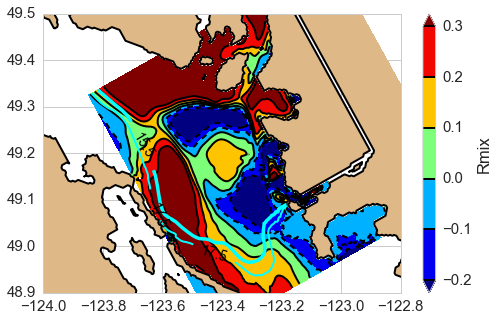

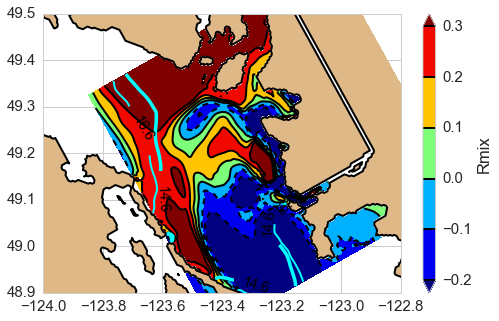

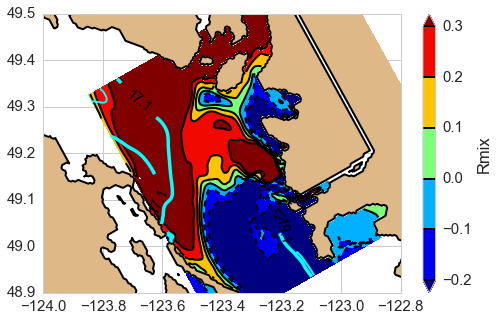

In [13]:
## What about daily evolution
## May 19
thre19 = threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,432,455,10,0)
## May 20
thre20 = threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,456,479,10,0)
## May 21
thre21 = threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,480,503,10,0)

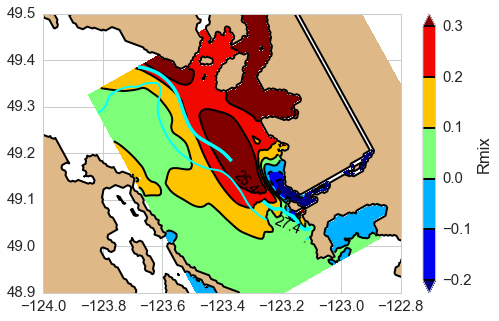

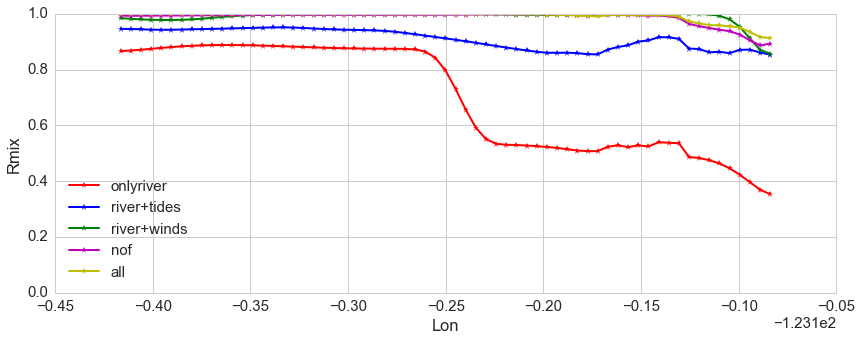

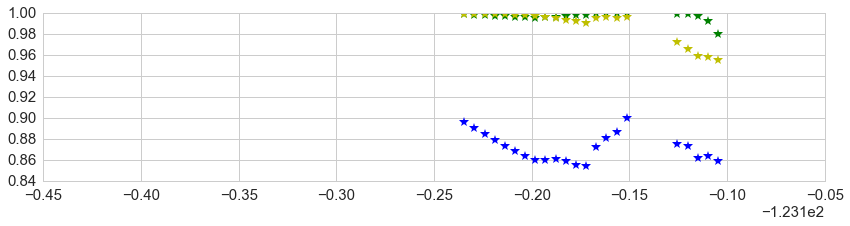

In [31]:
## NW wind blows the plume to NW, away from the river mouth region where mixing dominant by tides. That's why that 
## red blob exists (tide effect weak, wind-induced relatively strong then)
#moderate winds + late neap early spring tides, jan 17~19
threshold_whole_domain2(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,384,455,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(janriver_T,jannowind_T,jannotide_T,\
                                                             jannof_T,janall_T,384,455,np_mask,10)

* strong wind

i,lon,real salinity 44 -123.309 28.1728
i,lon,real salinity 45 -123.303 28.0463
i,lon,real salinity 46 -123.298 27.9612
i,lon,real salinity 47 -123.293 27.901
S_ref 28.811
S_thre 28.0444909286
S_ref 23.4999
S_thre 21.9898586655
i,lon,real salinity 18 -123.444 25.7039
i,lon,real salinity 19 -123.438 25.6032
i,lon,real salinity 20 -123.433 25.5273
i,lon,real salinity 21 -123.428 25.4859
i,lon,real salinity 22 -123.423 25.4853
i,lon,real salinity 23 -123.418 25.5286
i,lon,real salinity 24 -123.412 25.6098
i,lon,real salinity 25 -123.407 25.7063
i,lon,real salinity 26 -123.402 25.7908
i,lon,real salinity 52 -123.267 25.7141
i,lon,real salinity 53 -123.262 25.5304
S_ref 26.6591
S_thre 25.5914213562


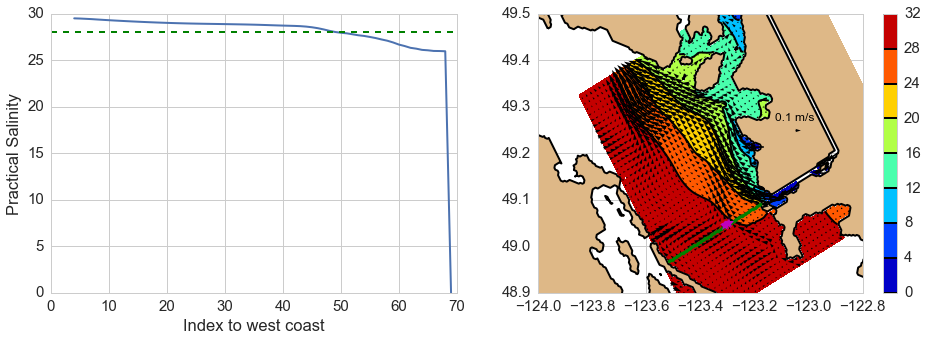

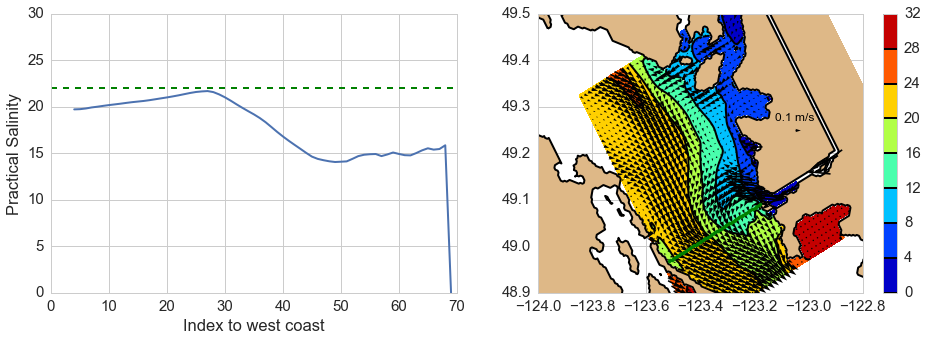

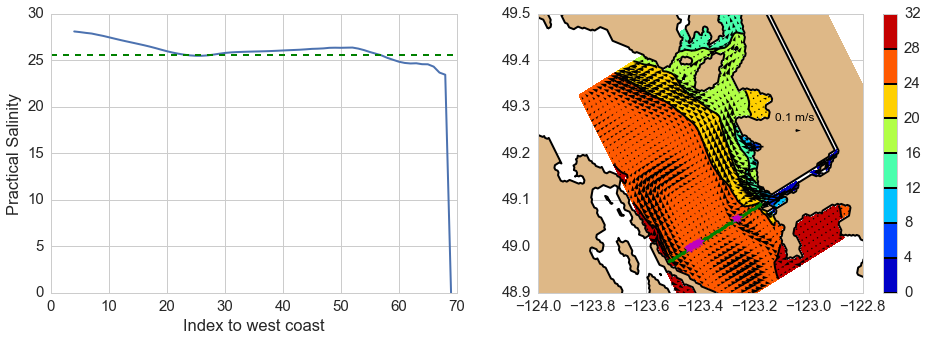

In [23]:
DEP.determine_plume_method2(octall_T,octall_U,octall_V,480,551,0,0.2) ## Oct 21~23, neap
DEP.determine_plume_method2(mayall_T,mayall_U,mayall_V,24,95,0,0.2) ## May 2~4, early spring tides
DEP.determine_plume_method2(janall_T,janall_U,janall_V,624,671,0,0.2) ## Jan 27~28, spring tides

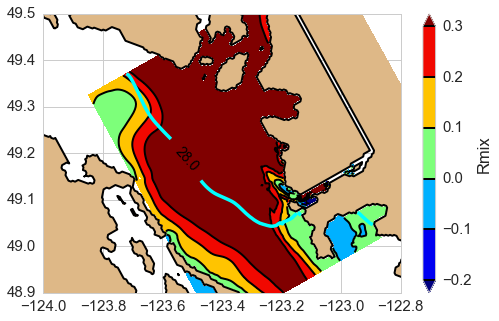

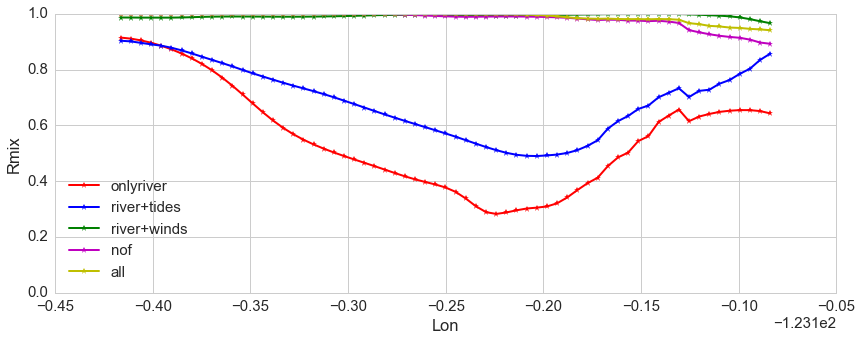

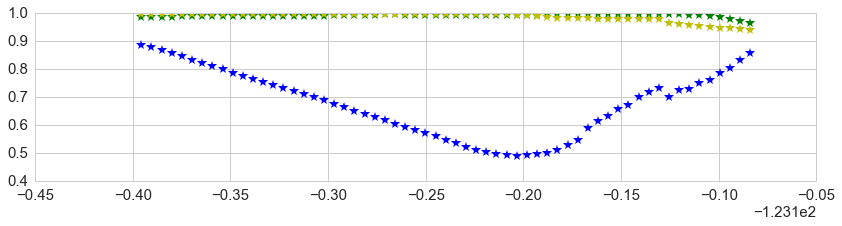

In [32]:
## the whole domain, strong winds + neap, oct 21~23
threshold_whole_domain2(octriver_T,octnowind_T,octnotide_T,octnof_T,octall_T,480,551,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(octriver_T,octnowind_T,octnotide_T,\
                                                             octnof_T,octall_T,480,551,np_mask,10)

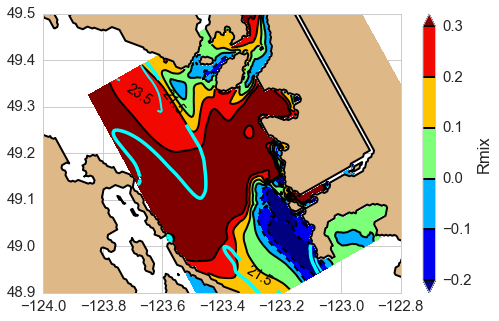

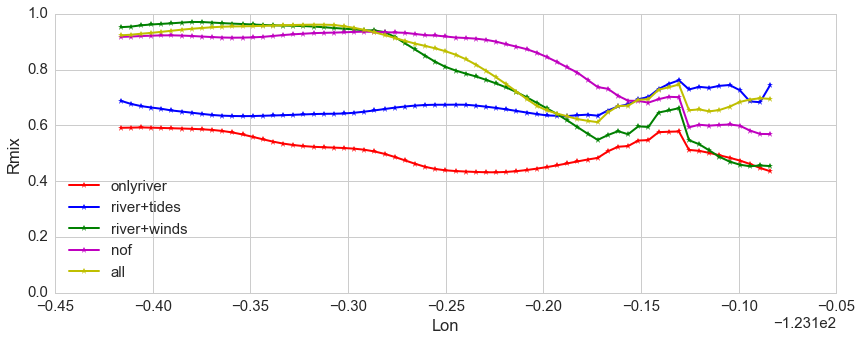

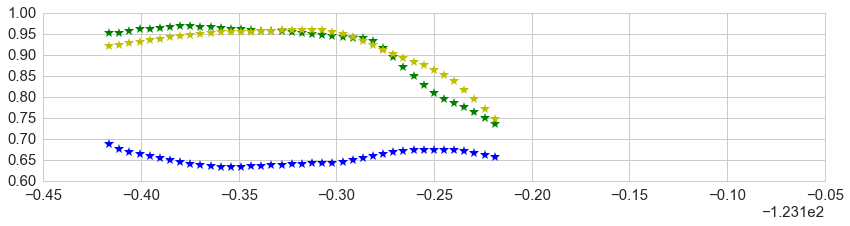

In [33]:
## the whole domain, strong winds + early spring tides, may 2~3
threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,24,71,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(mayriver_T,maynowind_T,maynotide_T,\
                                                             maynof_T,mayall_T,24,71,np_mask,10)

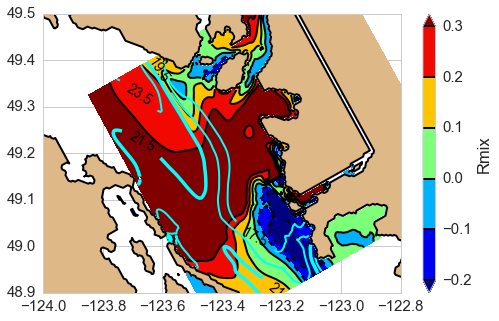

In [18]:
threshold =threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,24,71,10,0)

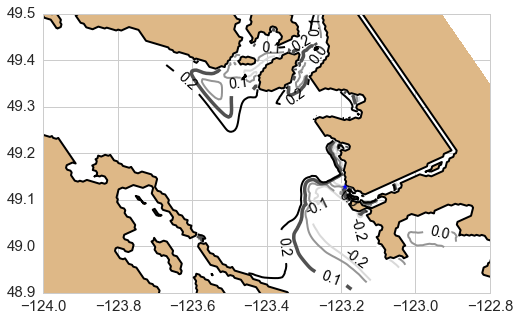

In [19]:
lon = mayall_T.variables['nav_lon'];
lat = mayall_T.variables['nav_lat']
fig, ax = plt.subplots(1,1,figsize = (8,5))
viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
viz_tools.plot_coastline(ax, grid6, coords = 'map')
ax.set_xlim([-124.,-122.8])
ax.set_ylim([48.9,49.5])
CS = ax.contour(lon[:],lat[:],threshold[:],levels=[-0.2,-0.1,0,0.1,0.2],hold='on',linewidths=(2,))
CS.collections[-2].set_linewidth(3.5) 
plt.clabel(CS,fmt='%2.1f', colors='k',fontsize = 14)
ax.plot(lon[44,72],lat[44,72],'b*')

In [42]:
geo_tools.haversine(lon[44,72],lat[44,72],-123.1,48.95)

20.812269010243618

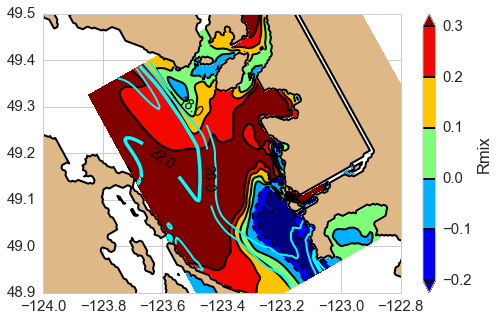

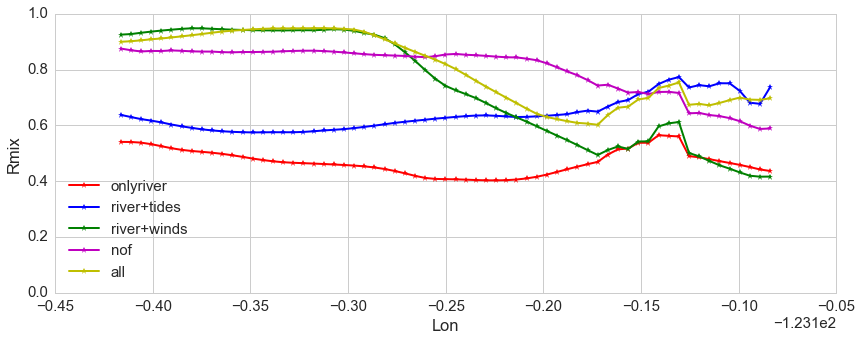

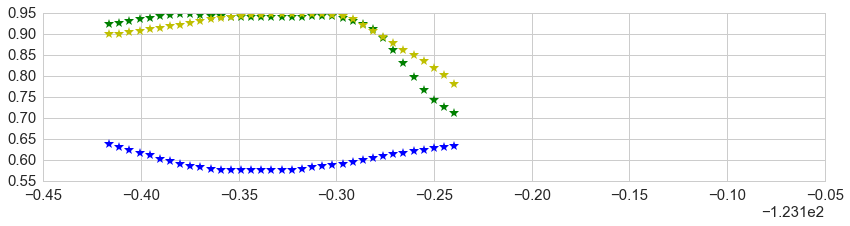

In [25]:
## the whole domain, strong winds + early spring tides, may 2~4
threshold_whole_domain2(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,24,95,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(mayriver_T,maynowind_T,maynotide_T,\
                                                             maynof_T,mayall_T,24,95,np_mask,10)

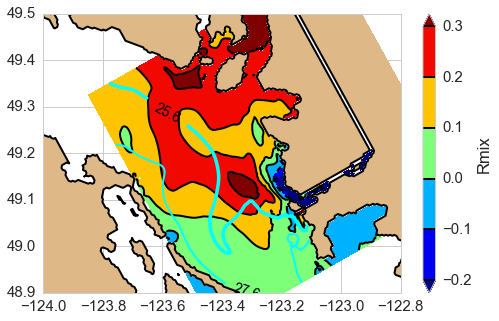

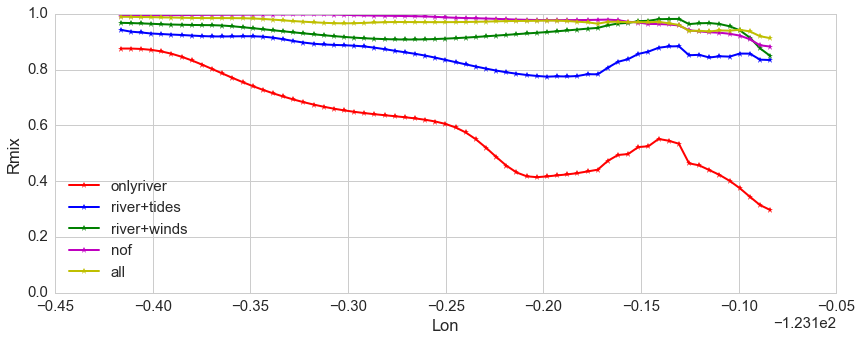

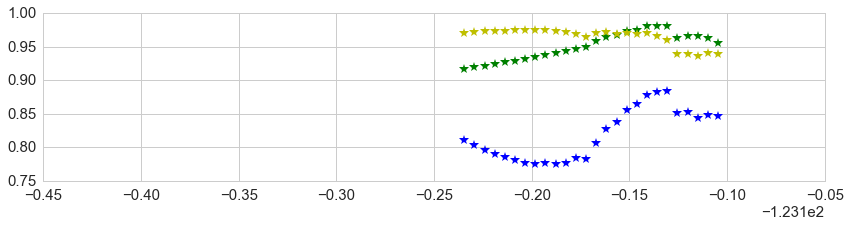

In [34]:
## the whole domain, strong winds + spring tides, jan 27~28
threshold_whole_domain2(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,624,671,10,0)
far_rmix_wind,far_rmix_tide,far_lon,iss = threshold_near_far(janriver_T,jannowind_T,jannotide_T,\
                                                             jannof_T,janall_T,624,671,np_mask,10)

masked_array(data =
 [[-0.02835269644856453 -0.028899449855089188 -0.02984677441418171 ..., --
  -- --]
 [-0.026970718055963516 -0.02749059908092022 -0.02799968235194683 ..., --
  -- --]
 [-0.025581950321793556 -0.026014963164925575 -0.026130611076951027 ..., --
  -- --]
 ..., 
 [0.06459064781665802 0.06388697028160095 0.06321801990270615 ..., -- -- --]
 [0.06516265124082565 0.06461838632822037 0.0640883594751358 ..., -- -- --]
 [0.06586279720067978 0.06537455320358276 0.0649283304810524 ..., -- -- --]],
             mask =
 [[False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 ..., 
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]],
       fill_value = 1e+20)

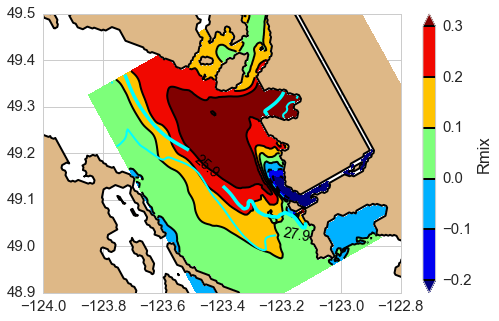

In [72]:
## another strong wind jan 21~22
threshold_whole_domain2(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,480,503,10,0)

In [ ]:
## moderate NW wind
rmix_each(mayriver_T,maynowind_T,maynotide_T,maynof_T,mayall_T,288,359,10)

In [ ]:
## strong wind jan
rmix_each(janriver_T,jannowind_T,jannotide_T,jannof_T,janall_T,624,671,10)

In [ ]:
## right one!!!